![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import os
from sklearn.model_selection import train_test_split
import sys
from datetime import datetime, timedelta
import math
import numpy as np  # linear algebra_
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

kaggle/input\sf-dst-restaurant-rating\kaggle_task.csv
kaggle/input\sf-dst-restaurant-rating\kaggle_task.csv.zip
kaggle/input\sf-dst-restaurant-rating\main_task.csv
kaggle/input\sf-dst-restaurant-rating\main_task.csv.zip
kaggle/input\sf-dst-restaurant-rating\sample_submission.csv
kaggle/input\sf-dst-restaurant-rating\submission.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [96]:
DATA_DIR = 'kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(2)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(2)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [97]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False) # объединяем
data[:5]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0


In [98]:
data=data.reset_index(drop=True)
data[:5]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [14]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
8600,id_8600,Lyon,['French'],920.0,NaN,24.0,"[[], []]",/Restaurant_Review-g187265-d6773412-Reviews-Ca...,d6773412,0,0.0
20200,id_4787,London,"['Cafe', 'British', 'Vegetarian Friendly', 'Gl...",4796.0,$$ - $$$,131.0,"[['Nice but a bit pricy', 'Excellent Lunch'], ...",/Restaurant_Review-g186338-d733358-Reviews-Cha...,d733358,1,4.0
18562,id_1042,Amsterdam,"['Italian', 'Pizza', 'European', 'Vegetarian F...",1045.0,$$ - $$$,167.0,"[['Love this place!', 'Cool'], ['10/07/2017', ...",/Restaurant_Review-g188590-d4071620-Reviews-Tr...,d4071620,1,4.0
4328,id_4328,Brussels,"['Belgian', 'Cafe', 'European', 'Vegetarian Fr...",46.0,$$ - $$$,128.0,"[['Quite Intriguing Drinks', 'Relaxing morning...",/Restaurant_Review-g188644-d8700988-Reviews-Ka...,d8700988,0,0.0
48102,id_1218,Copenhagen,"['European', 'Danish']",1220.0,$$ - $$$,33.0,"[['Surprise next to a shopping centre.', 'Exce...",/Restaurant_Review-g806262-d4131515-Reviews-Ca...,d4131515,1,3.5


In [15]:
data.Reviews[2]

"[['Better than the Links', 'Ivy Black'], ['12/28/2017', '12/06/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [16]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [17]:
data['Number_of_Reviews_isNAN'].value_counts()

0    46800
1     3200
Name: Number_of_Reviews_isNAN, dtype: int64

In [18]:
data['Number of Reviews'].describe()

count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

In [19]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

In [ ]:
#с Number of Reviews работа позже

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [20]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [21]:
data['City_']=data['City'] #сохранить копию столбеца, а то после думми он удаляется
data[:2]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,City_
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,Paris
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,Helsinki


In [22]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=['City', ], dummy_na=True)

In [24]:
data['City_'].sample(2)

7872     Oporto
22345     Paris
Name: City_, dtype: object

#### Возьмем следующий признак "Price Range".

In [214]:
pr=data['Price Range'].value_counts(dropna=False).index.tolist()
pr


['$$ - $$$', nan, '$', '$$$$']


По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [25]:
# Ваша обработка 'Price Range'
def pr_adpt(x):  # сопоставление последовательным числам признака разброса цен
    if str(x).startswith('$$ -'):
        return 1
    if str(x).startswith('nan'): #первая проба - присвоение пропущенным значениям -1
        return -1
    if x == '$':
        return 0
    else:
        return 2  # для самых больших цен


data['Price Range'] = data['Price Range'].apply(pr_adpt)
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
38717,id_1182,NaN,1183.0,-1,22.0,"[['Good place for smokers', 'Very nice place; ...",/Restaurant_Review-g274856-d7088246-Reviews-Pr...,d7088246,1,3.5,...,0,0,0,0,0,0,0,1,0,0
42308,id_8351,['Cafe'],8360.0,0,13.0,"[['Delicious lunch!', 'Nice little cafe'], ['0...",/Restaurant_Review-g186338-d1017664-Reviews-Ph...,d1017664,1,4.5,...,0,0,0,0,0,0,0,0,0,0
45691,id_2056,"['Cafe', 'Asian', 'Thai', 'Middle Eastern', 'V...",2060.0,1,120.0,"[['Great service, great food, great atmospher....",/Restaurant_Review-g186338-d2720705-Reviews-St...,d2720705,1,4.5,...,0,0,0,0,0,0,0,0,0,0
24558,id_13641,"['Indian', 'Bangladeshi', 'Halal']",13651.0,1,48.0,"[['Good food, Quirky Decor', 'Misogynistic Ser...",/Restaurant_Review-g186338-d1317844-Reviews-Ca...,d1317844,1,3.0,...,0,0,0,0,0,0,0,0,0,0
27438,id_2049,"['African', 'Ethiopian', 'Vegetarian Friendly'...",2050.0,1,211.0,"[['Authentic food at a price.', 'Would recomme...",/Restaurant_Review-g187497-d1020220-Reviews-Ab...,d1020220,1,4.0,...,0,0,0,0,0,0,0,0,0,0


> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [26]:
# тут ваш код на обработку других признаков
# .....


In [99]:
# работа с кухнями
from collections import Counter
dff = data
# убрать квадратные скобки из столбца
zz = dff['Cuisine Style'].str.replace('[[\]]', '', regex=True)
# заполнить отсутствие кухонь одной условной кухней
zz.fillna('kuh1', inplace=True)
# убрать лишние пробелы в названиях кухонь
dff['Cuisine Style'] = zz.apply(
    lambda x: ",".join(map(str.strip, x.split(','))))
# посчитать разнообразие кухонь и частоту употребления
ss = pd.Series(dff['Cuisine Style'].str.cat(sep=',').split(','))
cnt = Counter(ss)
print(cnt, len(cnt))

Counter({"'Vegetarian Friendly'": 14021, "'European'": 12561, 'kuh1': 11590, "'Mediterranean'": 7820, "'Italian'": 7433, "'Vegan Options'": 5684, "'Gluten Free Options'": 5185, "'Bar'": 4094, "'French'": 3970, "'Asian'": 3786, "'Pizza'": 3502, "'Spanish'": 3456, "'Pub'": 3058, "'Cafe'": 2883, "'Fast Food'": 2122, "'British'": 1992, "'International'": 1966, "'Seafood'": 1878, "'Japanese'": 1860, "'Central European'": 1727, "'American'": 1642, "'Sushi'": 1450, "'Chinese'": 1446, "'Portuguese'": 1385, "'Indian'": 1328, "'Middle Eastern'": 980, "'Thai'": 923, "'Wine Bar'": 877, "'German'": 820, "'Halal'": 773, "'Greek'": 768, "'Healthy'": 758, "'Fusion'": 748, "'Czech'": 745, "'Steakhouse'": 729, "'Barbecue'": 710, "'Contemporary'": 652, "'Soups'": 630, "'Eastern European'": 629, "'Vietnamese'": 622, "'Grill'": 617, "'Gastropub'": 608, "'Turkish'": 574, "'Mexican'": 572, "'South American'": 490, "'Delicatessen'": 473, "'Austrian'": 462, "'Polish'": 453, "'Scandinavian'": 449, "'Hungarian'"

In [28]:
def calcpopular(x):
    sumcuspop = 0
    cntcus = 0
    for i in cnt.keys():  # сложить "популярность"(насколько часто кухня практикуется во всех ресторанах) кухонь, присутствующих в ресторане
        if i in x:
            sumcuspop += cnt[i]
            cntcus += 1

    return pd.DataFrame(list(zip([sumcuspop], [cntcus])), columns=['R1', 'R2']).iloc[0]


# из предположения о популярности кухни  по количеству ее присутствия в ресторанах добавить свойство популярности Cuisinepopul
# а так же добавить свойство разнообразия Cuisinecnt - равное количеству разных кухонь
data[['Cuisinepopul', 'Cuisinecnt']] = dff['Cuisine Style'].apply(calcpopular)
data.sample(2)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Cuisinepopul,Cuisinecnt
47245,id_2635,kuh1,2641.0,-1,5.0,"[['decent traditional czech cusine'], ['04/20/...",/Restaurant_Review-g274707-d4767482-Reviews-Na...,d4767482,1,4.5,...,0,1,0,0,0,0,0,0,11590,1
46912,id_8099,"'Fast Food','Mexican','American'",8106.0,0,52.0,"[['Average Experience', 'good and cosy but not...",/Restaurant_Review-g187514-d3795117-Reviews-Pe...,d3795117,1,2.5,...,0,0,0,0,0,0,0,0,4336,3
7899,id_7899,"'American','Fast Food'",1002.0,0,25.0,"[['The Ritz of McDonalds', 'Like any other'], ...",/Restaurant_Review-g274887-d4802533-Reviews-Mc...,d4802533,0,0.0,...,0,0,0,0,0,0,0,0,3764,2
24022,id_2484,"'Polish','European'",2486.0,1,11.0,"[['Trying real pierogi in Vienna', 'One time a...",/Restaurant_Review-g190454-d6413536-Reviews-Pi...,d6413536,1,4.0,...,0,0,0,0,1,0,0,0,13014,2
48159,id_285,"'Pizza','Fast Food'",286.0,0,42.0,"[['good pizza . good price . bad service.', 'v...",/Restaurant_Review-g189934-d6884326-Reviews-Ba...,d6884326,1,4.0,...,0,0,0,0,0,0,0,0,5624,2


In [102]:
dff[:2]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"'Bar','Pub'",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"'European','Scandinavian','Gluten Free Options...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0


In [101]:
tmp=dff[:2]
#tmp=tmp['Cuisine Style'].apply(lambda x: pd.Series([x]).str.get_dummies(sep=','))
tmp['Cuisine Style']=tmp.apply(lambda x: str(x['Cuisine Style']).replace(",","|"),axis=1)
tmp=pd.Series(tmp['Cuisine Style'].tolist).str.get_dummies()
display(tmp)

<ipython-input-101-16fe103a083d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Cuisine Style']=tmp.apply(lambda x: str(x['Cuisine Style']).replace(",","|"),axis=1)


,"'Gluten Free Options...\nName: Cuisine Style, dtype: object>",'Pub'\n1 'European','Scandinavian',<bound method IndexOpsMixin.tolist of 0 'Bar'
0,1,1,1,1


In [29]:
# работа с Reviews: обработка дат и характера(цвета) отзывов
nicerev = list(map(str.upper, ['Cosy', 'fair', 'Charming', 'Cool', 'Decent', 'pleasant', 'Perfect', 'tasty', 'highly recommended', 'Ideal', 'Amazing', 'Fantastic', 'Great',
                               'good', 'fine', 'nice', 'Delicious', 'honest', 'Decent', 'Not bad', 'tasty', 'Quick', 'best', 'exellent', 'Wonderful', 'Top', 'Beautiful', 'High quality', 'LOVE', 'Friendl']))
badrev = list(map(str.upper, ['avoid', 'Incompetent', 'Poor', 'Overpriced', 'Terrible',
                              'not enjoy', 'disaster', 'doubt', 'bad', 'Unpleasant', 'Needy', 'No better']))

debcnt = -1  # для отладки счетчик строк, где произошла ошибка


def todtdt(intrp1):  # обработка вложенных списков посредством eval
    bb = 0
    global debcnt
    try:
        debcnt += 1
        # обработка строки intrp1.Reviews вида [[отзыв отзыв],[дата дата]]
        if (intrp1.Reviews is None) or (str(intrp1.Reviews) == 'nan'):
            # math.isnan(intrp1.Reviews) or
            # замена пропусков на древнюю дату 1970
            bb = np.asarray([[], ["01/01/1970"]])
        else:
            bb = eval("np.asarray({})".format(
                str(intrp1.Reviews).replace('nan', '"01/01/1970"')))
        # обработка отзывов
        revcolor = 0

        def lookcolor(x):  # для положительных отзывов - увеличение, для отрицательных - уменьшение счетчика
            nonlocal revcolor
            for xx in nicerev:
                if xx in x.upper():
                    revcolor += 1
            for xx in badrev:
                if xx in x.upper():
                    revcolor -= 1
            return revcolor

        list(map(lookcolor, bb[0]))

        # обработка дат
        aa = np.fromiter(map(lambda x: datetime.strptime(
            x, '%m/%d/%Y'), bb[1]), dtype='datetime64[D]')
        # заменить отсутствующие данные на древнюю дату 1970г.
        if aa.shape[0] == 0:
            aa = np.asarray([np.datetime64('1970-01-01')])
        aa.sort()
        return pd.DataFrame(list(zip([aa[0]], [aa[-1]], [revcolor])), columns=['R1', 'R2', 'R3']).iloc[0]
    except Exception:  # вывод информации для понимания, в какой строке и почему код не сработал
        print("bb", bb, "debcnt", debcnt, "intrp.Reviews", intrp1.Reviews, str(
            intrp1.Reviews), "tttttype", type(intrp1.Reviews))
        print("Unexpected error:", sys.exc_info()[0])
        raise Exception


# добавить столбцы с датами двух последних отзывов и "цветом" отзывов

dff[['RevF', 'RevL', 'revcolor']] = dff.apply(todtdt, axis=1)

# найти даты самых древних и свежих отзывов
RevF = dff[dff.RevF != np.datetime64('1970-01-01')]['RevF'].min()
RevL = dff['RevL'].max()


def RevFL(x):  # вычислить признаки количества дней между двумя последними отзывами и
    # "свежесть" последнего отзыва по сравнению с наиболее свежим среди всех ресторанов RevL
    # где были пропуски  сравнивать с древней датой
    RevLcurent = x.RevL
    if x.RevF == np.datetime64('1970-01-01'):
        RevLcurent = x.RevF  # сохранить для вычисления "свежести" последнего отзыва
        x.RevF = RevF
        x.RevL = RevL
    return pd.DataFrame(list(zip([x.RevF], [x.RevL], [np.timedelta64(x.RevL-x.RevF, 'D').astype(int)], [np.timedelta64(RevL-RevLcurent, 'D').astype(int)]))).iloc[0]


# для изначально отсутствующих данных установить самый большой интервал между отзывами difffirstlastrev, что должно предположительно снижать рейтинг
# а так же вычислить свежесть отзыва difflast (для отсутствующих данных установить большую древность (от 1970 года), что тоже предположительно уменьшает рейтинг)
data[['RevF', 'RevL', 'difffirstlastrev', 'difflast']] = dff.apply(
    RevFL, axis=1)

data.sample(3)

C:\Users\Sawa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Warsaw,City_Zurich,City_nan,Cuisinepopul,Cuisinecnt,RevF,RevL,revcolor,difffirstlastrev,difflast
4912,id_4912,"'Asian','Taiwanese','Vietnamese'",6115.0,0,16.0,"[['great home made food', 'The place to be if ...",/Restaurant_Review-g187147-d1328307-Reviews-Op...,d1328307,0,0.0,...,0,0,0,4438,3,2016-07-28,2016-11-11,1,106,472
35957,id_5675,"'European','French','Portuguese'",5676.0,1,40.0,"[['Great Food and Prices, Friendly Environmen....",/Restaurant_Review-g187147-d3736244-Reviews-Le...,d3736244,1,4.0,...,0,0,0,17916,3,2017-07-19,2017-10-30,2,103,119
40178,id_1038,"'Vegetarian Friendly','Vegan Options','Gluten ...",1039.0,-1,43.0,"[['Great food and prices', 'Good food, fun ide...",/Restaurant_Review-g189852-d12716741-Reviews-P...,d12716741,1,3.5,...,0,0,0,24890,3,2017-11-15,2018-01-06,3,52,51


# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

<AxesSubplot:>

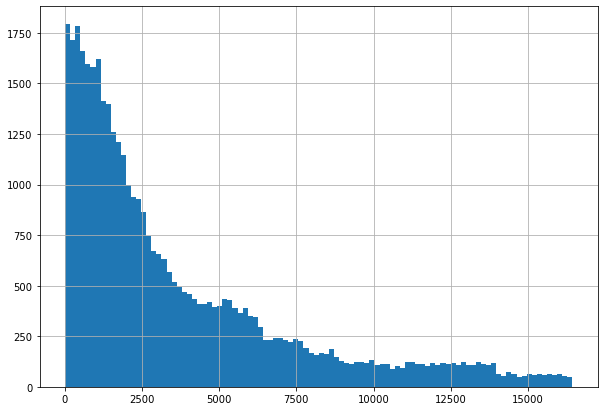

In [30]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

<AxesSubplot:>

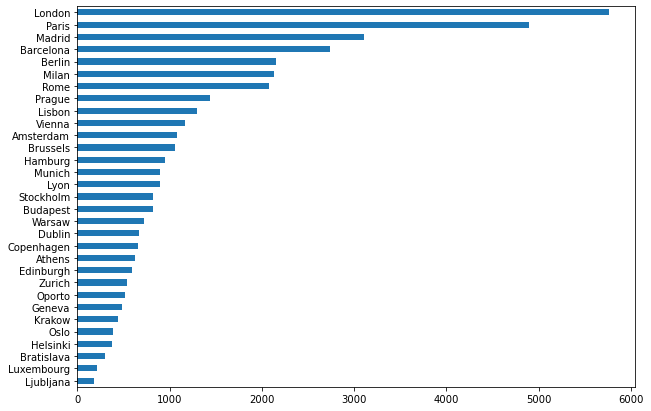

In [31]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

<AxesSubplot:>

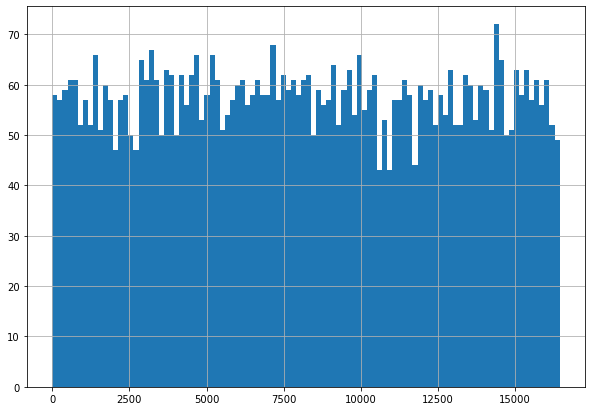

In [32]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

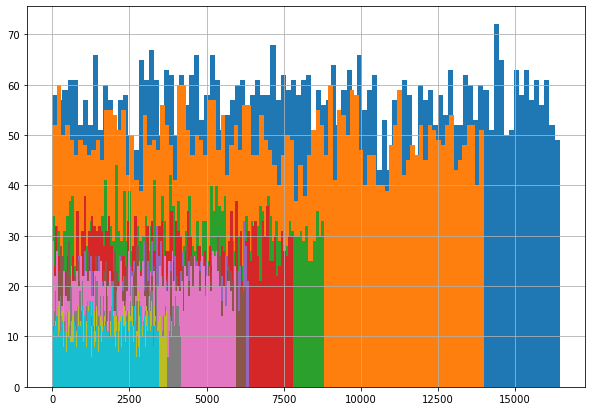

In [33]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


In [34]:
df_look=data.groupby(['City_'])['Ranking'].describe().sort_values(by='max')
df_look['lin']=df_look.apply(lambda x: x['max'] / x['count'],axis=1)
df_look


,count,mean,std,min,25%,50%,75%,max,lin
City_,,,,,,,,,
Ljubljana,222.0,234.509009,136.371954,3.0,118.25,230.5,354.25,468.0,2.108108
Luxembourg,263.0,308.159696,180.032856,2.0,154.50,314.0,469.50,621.0,2.361217
Bratislava,380.0,462.428947,254.272873,3.0,250.75,478.5,675.25,889.0,2.339474
Oslo,488.0,552.569672,327.988605,1.0,274.50,529.5,834.25,1137.0,2.329918
Helsinki,475.0,564.231579,326.252609,4.0,281.50,564.0,831.50,1141.0,2.402105
Krakow,554.0,616.267148,357.832799,1.0,305.50,614.0,917.50,1244.0,2.245487
Geneva,590.0,713.227119,409.801740,3.0,357.50,710.5,1067.50,1413.0,2.394915
Oporto,642.0,752.034268,426.344754,4.0,377.25,758.0,1107.50,1484.0,2.311526
Zurich,685.0,794.280292,464.525263,2.0,401.00,777.0,1211.00,1601.0,2.337226


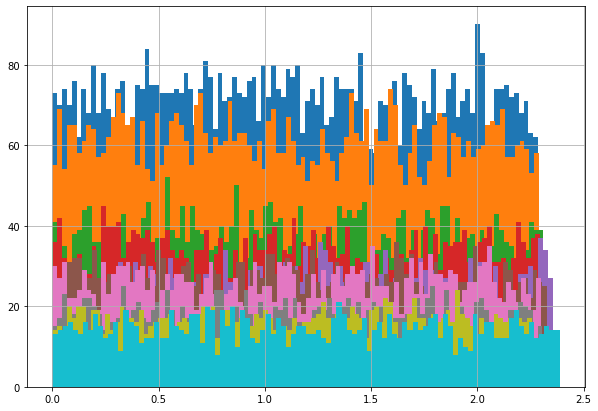

In [36]:
#максимальный ранкинг пропорционален (столбец lin выше) количеству ресторанов в городе
#создать универсальный признак, адекватно сопоставимый для любого города
data['newRanking']=data.apply(lambda x: x['Ranking'] / df_look.loc[x.City_]['count'],axis=1)

for x in (data['City_'].value_counts())[0:10].index:
    data['newRanking'][data['City_'] == x].hist(bins=100)
plt.show()

### Посмотрим распределение целевой переменной

<AxesSubplot:>

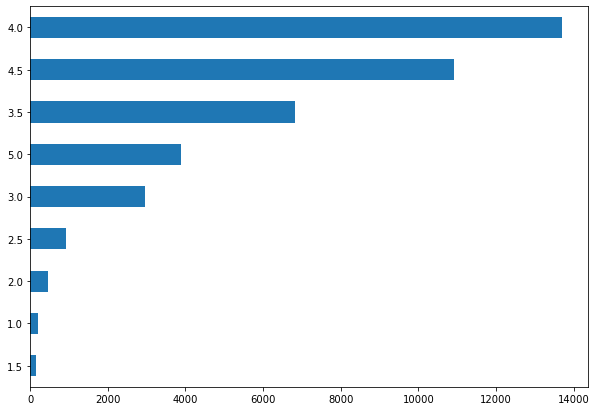

In [37]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

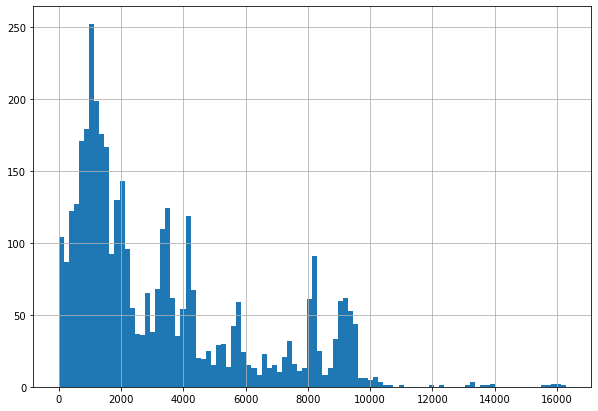

In [38]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

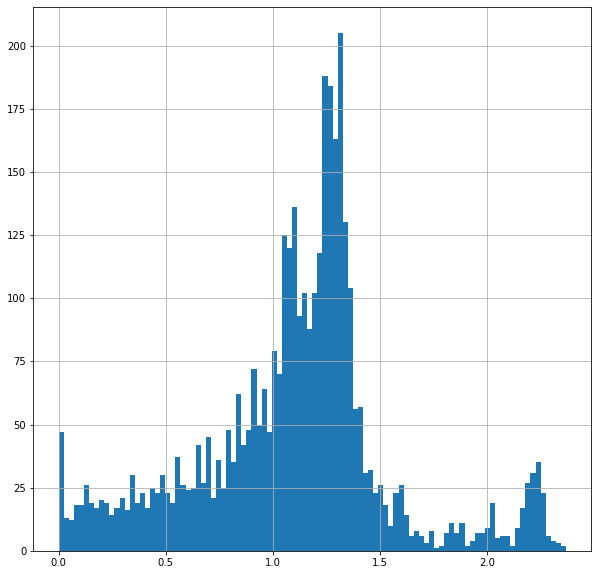

In [80]:
data['newRanking'][data['Rating'] == 5].hist(bins=100)

In [81]:
data['newRanking'].describe()

count    50000.000000
mean         1.155723
std          0.667952
min          0.000139
25%          0.577355
50%          1.151105
75%          1.732897
max          2.413100
Name: newRanking, dtype: float64

<AxesSubplot:>

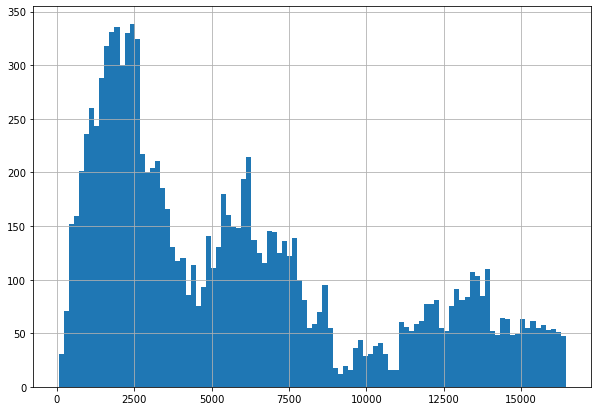

In [226]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

<AxesSubplot:>

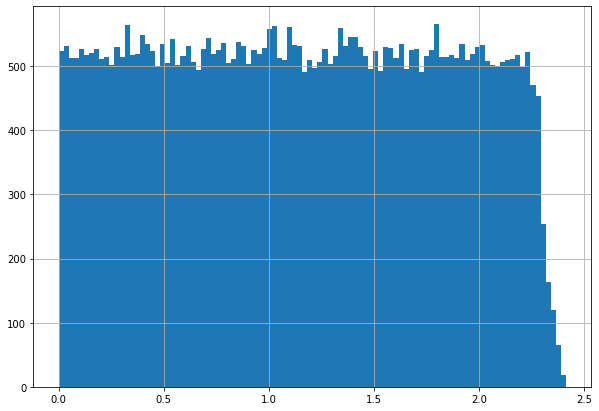

In [39]:
data['newRanking'].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

<AxesSubplot:>

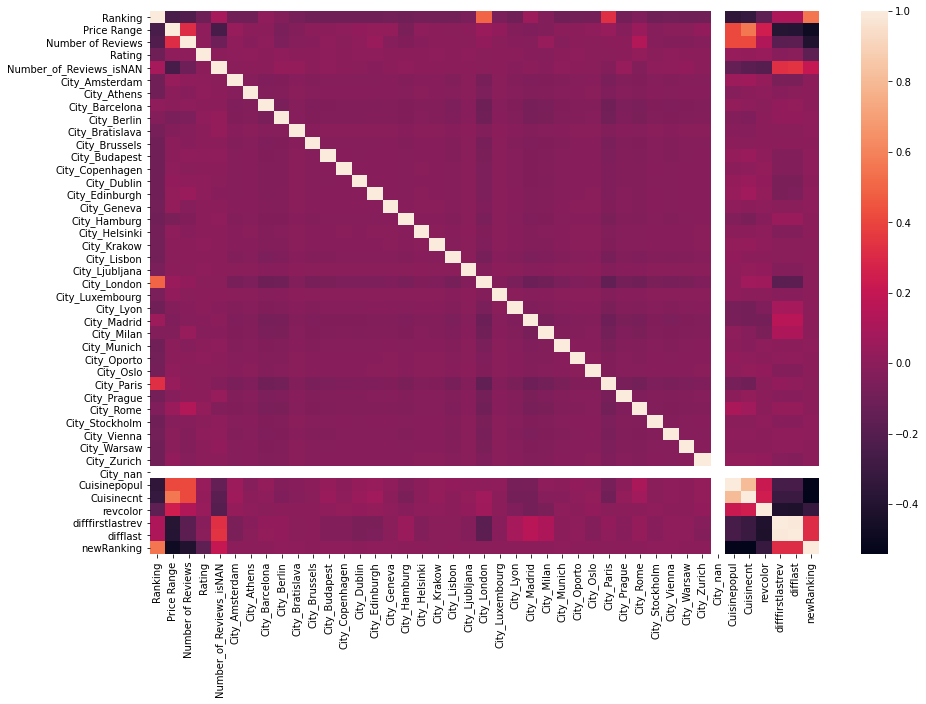

In [40]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [228]:
# # на всякий случай, заново подгружаем данные
# df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
# df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
# df_train['sample'] = 1 # помечаем где у нас трейн
# df_test['sample'] = 0 # помечаем где у нас тест
# df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

# data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
# data.info()

In [229]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

ОТВЕДЕННОГО НА ПРОЕКТ ВРЕМЕНИ НЕДОСТАТОЧНО

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Restaurant_id            50000 non-null  object        
 1   Cuisine Style            50000 non-null  object        
 2   Ranking                  50000 non-null  float64       
 3   Price Range              50000 non-null  int64         
 4   Number of Reviews        50000 non-null  float64       
 5   Reviews                  49998 non-null  object        
 6   URL_TA                   50000 non-null  object        
 7   ID_TA                    50000 non-null  object        
 8   sample                   50000 non-null  int64         
 9   Rating                   50000 non-null  float64       
 10  Number_of_Reviews_isNAN  50000 non-null  uint8         
 11  City_                    50000 non-null  object        
 12  City_Amsterdam           50000 n

In [43]:
# удалить нечисловые колонки
notnumcol = []
yy = map(lambda v, z: [v, z], data.dtypes, data.columns)
for xx in yy:
    print("dtypes", xx[0].name)
    if (xx[0].name == 'object') or (xx[0].name == 'datetime64[ns]'):
        # if (xx[0].name!='float64') and (xx[0].name!='uint8') and (xx[0].name!='datetime64[ns]' and (xx[0].name!='int64')):
        notnumcol.append(xx[1])
# notnumcol.remove('Restaurant_id') #не удалять столбец
df_preproc = data.drop(notnumcol, axis=1)


dtypes object
dtypes object
dtypes float64
dtypes int64
dtypes float64
dtypes object
dtypes object
dtypes object
dtypes int64
dtypes float64
dtypes uint8
dtypes object
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes uint8
dtypes int64
dtypes int64
dtypes datetime64[ns]
dtypes datetime64[ns]
dtypes int64
dtypes int64
dtypes int64
dtypes float64


#### Запускаем и проверяем что получилось

In [44]:
#df_preproc = preproc_data(data)
df_preproc.sample(2)

,Ranking,Price Range,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,City_Vienna,City_Warsaw,City_Zurich,City_nan,Cuisinepopul,Cuisinecnt,revcolor,difffirstlastrev,difflast,newRanking
15844,4638.0,-1,24.0,1,4.0,0,0,0,0,1,...,0,0,0,0,11590,1,2,16,208,1.714603
23481,2558.0,1,183.0,1,4.0,0,0,0,0,0,...,0,0,0,0,3764,2,2,105,59,0.418795


In [233]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ranking                  50000 non-null  float64
 1   Price Range              50000 non-null  int64  
 2   Number of Reviews        50000 non-null  float64
 3   sample                   50000 non-null  int64  
 4   Rating                   50000 non-null  float64
 5   Number_of_Reviews_isNAN  50000 non-null  uint8  
 6   newRanking               50000 non-null  float64
 7   City_Amsterdam           50000 non-null  uint8  
 8   City_Athens              50000 non-null  uint8  
 9   City_Barcelona           50000 non-null  uint8  
 10  City_Berlin              50000 non-null  uint8  
 11  City_Bratislava          50000 non-null  uint8  
 12  City_Brussels            50000 non-null  uint8  
 13  City_Budapest            50000 non-null  uint8  
 14  City_Copenhagen       

In [234]:

#Number of Reviews второй (после Ranking) по значимости признак для предсказания рейтинга (видно после первого прогона модели)
#и скореллирован с признаками Ranking,Price Range,'Cuisinepopul','Cuisinecnt','difffirstlastrev','difflast'
#попробовать предсказать с помощью ML Number of Reviews на основе этих перечисленных????????????


In [45]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [46]:
# выбрать данные для обучения, в которых не были пропущены значения
train_data1 = df_preproc[df_preproc['Number of Reviews'] != 0]
# и данные, где надо бы что-то поставить
test_data1 = df_preproc[df_preproc['Number of Reviews'] == 0]

In [47]:
df_preproc.columns

Index(['Ranking', 'Price Range', 'Number of Reviews', 'sample', 'Rating',
       'Number_of_Reviews_isNAN', 'City_Amsterdam', 'City_Athens',
       'City_Barcelona', 'City_Berlin', 'City_Bratislava', 'City_Brussels',
       'City_Budapest', 'City_Copenhagen', 'City_Dublin', 'City_Edinburgh',
       'City_Geneva', 'City_Hamburg', 'City_Helsinki', 'City_Krakow',
       'City_Lisbon', 'City_Ljubljana', 'City_London', 'City_Luxembourg',
       'City_Lyon', 'City_Madrid', 'City_Milan', 'City_Munich', 'City_Oporto',
       'City_Oslo', 'City_Paris', 'City_Prague', 'City_Rome', 'City_Stockholm',
       'City_Vienna', 'City_Warsaw', 'City_Zurich', 'City_nan', 'Cuisinepopul',
       'Cuisinecnt', 'revcolor', 'difffirstlastrev', 'difflast', 'newRanking'],
      dtype='object')

In [48]:
#выбрать колонки, по которым предсказывать Number of Reviews
inclcoltmp=['newRanking', 'Price Range','Cuisinepopul','Cuisinecnt', 'City_Amsterdam', 'City_Athens',
       'City_Barcelona', 'City_Berlin', 'City_Bratislava', 'City_Brussels',
       'City_Budapest', 'City_Copenhagen', 'City_Dublin', 'City_Edinburgh',
       'City_Geneva', 'City_Hamburg', 'City_Helsinki', 'City_Krakow',
       'City_Lisbon', 'City_Ljubljana', 'City_London', 'City_Luxembourg',
       'City_Lyon', 'City_Madrid', 'City_Milan', 'City_Munich', 'City_Oporto',
       'City_Oslo', 'City_Paris', 'City_Prague', 'City_Rome', 'City_Stockholm',
       'City_Vienna', 'City_Warsaw', 'City_Zurich','difffirstlastrev','difflast','revcolor']
exclcoltmp=list(set(df_preproc.columns).difference(set(inclcoltmp)))
exclcoltmp #эти исключить

['Number_of_Reviews_isNAN',
 'City_nan',
 'Number of Reviews',
 'Ranking',
 'Rating',
 'sample']

In [49]:
train_data1.sample(3)


,Ranking,Price Range,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,City_Vienna,City_Warsaw,City_Zurich,City_nan,Cuisinepopul,Cuisinecnt,revcolor,difffirstlastrev,difflast,newRanking
34040,832.0,0,20.0,1,4.0,0,0,1,0,0,...,0,0,0,0,8588,2,2,339,68,1.072165
16400,11742.0,1,115.0,1,3.5,0,0,0,0,0,...,0,0,0,0,21494,6,1,24,67,1.632420
15580,4595.0,1,9.0,1,4.5,0,0,0,0,0,...,0,0,0,0,7433,1,0,5059,17588,1.774817


In [50]:
test_data1.sample(3)

,Ranking,Price Range,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,City_Vienna,City_Warsaw,City_Zurich,City_nan,Cuisinepopul,Cuisinecnt,revcolor,difffirstlastrev,difflast,newRanking
42152,16031.0,-1,0.0,1,2.0,1,0,0,0,0,...,0,0,0,0,1860,1,-1,0,1794,2.228695
34992,2565.0,-1,0.0,1,3.0,1,0,0,0,0,...,0,0,0,0,11590,1,0,0,1232,2.240175
445,12370.0,-1,0.0,0,0.0,1,0,0,0,0,...,0,0,0,0,7433,1,0,0,519,1.719728


In [52]:
y = train_data1['Number of Reviews'].values            # наш таргет
X = train_data1.drop(exclcoltmp, axis=1)
# print(y,X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=RANDOM_SEED)
test_data1.shape, train_data1.shape, X.shape, X_train.shape, X_test.shape
model = RandomForestRegressor(
    n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


MAE: 78.8697483974359


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [ ]:
#MAE=78 очень большая, фокус не получился

In [53]:
df_look = data.groupby(['City_'])[
    'Number of Reviews'].describe().sort_values(by='max')
df_look

,count,mean,std,min,25%,50%,75%,max
City_,,,,,,,,
Luxembourg,263.0,79.152091,116.754847,0.0,7.00,33.0,90.50,652.0
Hamburg,1186.0,41.191400,86.195302,0.0,4.00,14.0,38.00,845.0
Oslo,488.0,95.495902,181.422499,0.0,8.00,27.0,92.25,1391.0
Stockholm,1033.0,69.301065,160.845656,0.0,5.00,16.0,56.00,1461.0
Helsinki,475.0,62.128421,136.442343,0.0,6.00,18.0,55.00,1488.0
Geneva,590.0,57.747458,114.076400,0.0,6.25,26.0,67.75,1624.0
Lyon,1126.0,83.438721,150.628359,0.0,8.25,28.0,89.00,1953.0
Zurich,685.0,68.275912,124.756212,0.0,7.00,25.0,77.00,1974.0
Ljubljana,222.0,82.292793,199.504249,0.0,6.00,18.0,58.75,2006.0


In [54]:
# заполнить нулевые значения: задать количество просмотров равным среднему для данного города
data['Number of Reviews'] = data.apply(
    lambda x: df_look.loc[x.City_]['mean'] if x['Number of Reviews'] == 0 else x['Number of Reviews'], axis=1)
data.sample(3)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Zurich,City_nan,Cuisinepopul,Cuisinecnt,RevF,RevL,revcolor,difffirstlastrev,difflast,newRanking
10560,id_1776,"'Polish','European'",1777.0,0,3.0,"[['Recommended'], ['05/20/2017']]",/Restaurant_Review-g188644-d11445075-Reviews-P...,d11445075,1,4.5,...,0,0,13014,2,2017-05-20,2017-05-20,0,0,282,1.352359
39216,id_3937,"'Italian','Pizza'",3939.0,1,44.0,[['Nice pizza shame about the awful customer.....,/Restaurant_Review-g187514-d4828224-Reviews-Am...,d4828224,1,3.5,...,0,0,10935,2,2014-11-02,2015-10-19,1,351,861,1.033045
20523,id_1298,"'Indian','Vegetarian Friendly','Vegan Options'",1301.0,1,36.0,"[['Little Gem!', 'Indian Food Professionals'],...",/Restaurant_Review-g186605-d1902110-Reviews-De...,d1902110,1,4.5,...,0,0,21033,3,2017-09-05,2017-10-22,0,47,127,1.556220


In [66]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating', 'Number_of_Reviews_isNAN'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [67]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [68]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 43), (40000, 43), (40000, 41), (32000, 41), (8000, 41))

In [69]:
X.sample(3)

,Ranking,Price Range,Number of Reviews,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,...,City_Vienna,City_Warsaw,City_Zurich,City_nan,Cuisinepopul,Cuisinecnt,revcolor,difffirstlastrev,difflast,newRanking
31345,12310.0,-1,11.0,0,0,0,0,0,0,0,...,0,0,0,0,11590,1,1,51,601,1.711386
19951,1128.0,1,24.0,1,0,0,0,0,0,0,...,0,0,0,0,20297,4,1,9,128,0.822157
43809,5903.0,-1,13.0,0,0,1,0,0,0,0,...,0,0,0,0,11590,1,1,238,207,1.738733


# Model 
Сам ML

In [70]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [71]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.203200625


<AxesSubplot:>

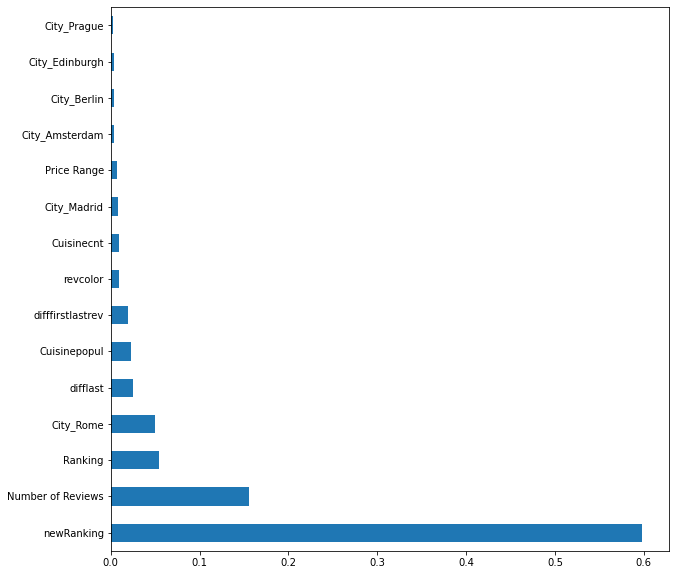

In [72]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10, 10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [73]:
test_data.sample(3)

,Ranking,Price Range,Number of Reviews,Rating,Number_of_Reviews_isNAN,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,...,City_Vienna,City_Warsaw,City_Zurich,City_nan,Cuisinepopul,Cuisinecnt,revcolor,difffirstlastrev,difflast,newRanking
6664,13969.0,-1,0.0,0.0,1,0,0,0,0,0,...,0,0,0,0,3970,1,0,5059,17588,2.287001
6886,2284.0,0,32.0,0.0,0,0,0,0,1,0,...,0,0,0,0,22260,5,3,63,230,0.844362
3506,15856.0,0,34.0,0.0,0,0,0,0,0,0,...,0,0,0,0,3764,2,1,166,120,2.204365


In [74]:
test_data = test_data.drop(['Rating', 'Number_of_Reviews_isNAN'], axis=1)

In [75]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [76]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [77]:
predict_submission

array([3.04 , 4.265, 4.425, ..., 3.065, 4.495, 4.365])

In [78]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.040
1,id_1,4.265
2,id_2,4.425
3,id_3,4.335
4,id_4,4.485
5,id_5,4.465
6,id_6,2.555
7,id_7,2.410
8,id_8,4.045
9,id_9,4.585


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
